# Microestructura y Sistemas de Trading
## 001 Microstructure

Presenta :

- José Armando Melchor Soto


---

### Librerías 

In [9]:
import math
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.integrate import quad
from scipy.optimize import minimize

---

### Funciones 

#### Función Earlang 

In [10]:
def earlang(S, k, lam):

    return (lam**k * S**(k-1) * np.exp(-lam*S)) / math.factorial(k-1)

#### Función PLB

In [11]:
def p_lb(spreads):

    return np.maximum(0.5 - 0.08 * spreads, 0)

#### Función PLS

In [12]:
def p_ls(spreads):
    
    return np.maximum(0.5 - 0.08 * spreads, 0)

#### Función Objetivo

In [13]:
def objective(x, p_i, S0, k, lam):

     Ka, Kb = x
     
     p1 = (1 - p_i) * (p_lb(Ka - S0) * (Ka - S0) + (p_lb(S0 - Kb) * (S0 - Kb)))
     
     p2 = quad(lambda S: (S - Ka) * earlang(S, k, lam), Ka, np.inf)[0]

     p3 = quad(lambda S: (Kb - S) * earlang(S, k, lam), 0, Kb)[0]
     
     return -(p1 - p_i * (p2 + p3))

#### Función Optimal Bid-Ask

In [14]:
def optimize_bid_ask(S0, p_i, k, lam):

    x0 = [S0+1, S0-1]

    bounds = [(10, 33), (10, 33)]
    
    constraint = {'type': 'ineq', 'fun': lambda x: x[0] - x[1]}  

    result = minimize(objective, x0, method="SLSQP", args=(p_i, S0, k, lam), bounds=bounds, constraints=constraint)

    ask, bid = result.x

    return ask, bid

#### Función Gráfica Price Distribution

In [15]:
def price_distribution(x=S, y=earlang):

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Price Distribution'))
    
    fig.update_layout(
        title="Price Distribution",
        xaxis_title="S",
        yaxis_title="Probability Density"
    )
    
    fig.show()

#### Función Gráfica Expected Revenue 

In [16]:
def expected_revenue(spread, fun):

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=spread, y=fun, mode='lines' , name= 'O'))

    fig.add_trace(go.Scatter(x=spread, y= (1-p_i)* spread, mode='lines', name= 'R'))

    fig.add_trace(go.Scatter(x=spread, y= spread, mode='lines', name= 'Q'))

    fig.update_layout(
        title="Expected Revenue",
        xaxis_title="Spread",
        yaxis_title="Payoff"
    )

    fig.show()

#### Función Gráfica Bid-Ask

In [17]:
def Bid_Ask(S, S0, ask, bid, ear): 
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=S, y=ear, mode='lines', name='Price Distribution'))
    
    fig.add_trace(go.Scatter(x=[S0, S0], y=[0, max(ear)], mode="lines", line=dict(color="black", dash="dash", width=2), name=f"S0 = {S0:.2f}"))
    
    fig.add_trace(go.Scatter(x=[ask, ask], y=[0, max(ear)], mode="lines", line=dict(color="red", dash="dash", width=2), name=f"Ask = {ask:.2f}")) 
    
    fig.add_trace(go.Scatter(x=[bid, bid], y=[0, max(ear)], mode="lines", line=dict(color="blue", dash="dash", width=2), name=f"Bid = {bid:.2f}")) 
    
    fig.update_layout(title="Optimal Bid-Ask", xaxis_title="S", yaxis_title="Probability Density") 
    
    fig.show()


---

### Parámetros

In [18]:
k= 60
lam= 3
S0 = 19.90
p_i = 0.4
S = np.linspace(10, 33, 100)
bounds = [(10, 33), (10, 33)]

### Price Distribution

In [19]:
ear = earlang(S, k, lam)

price_distribution(S, ear)

### Expected Revenue

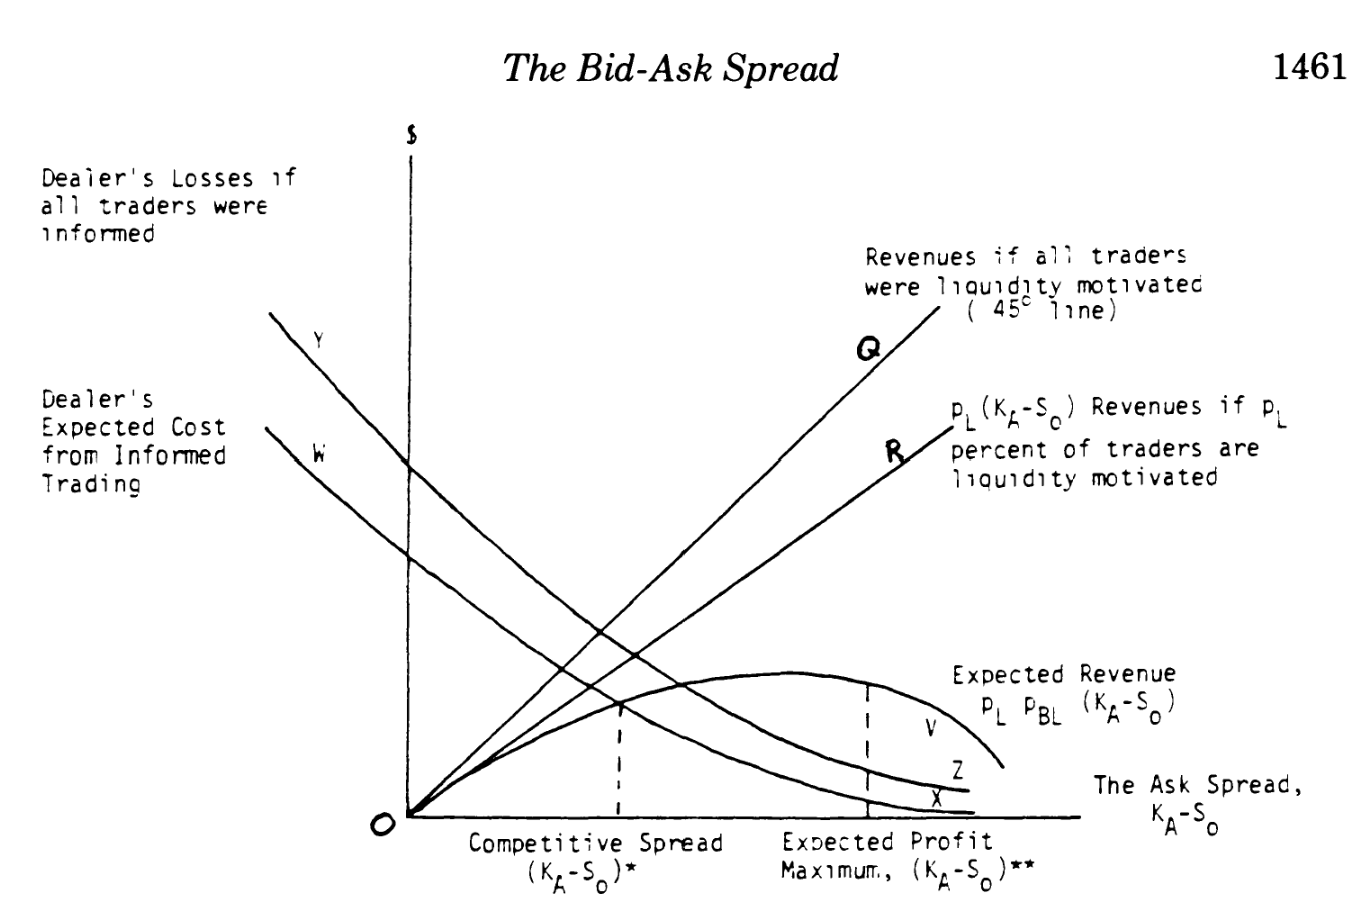

In [20]:
spread = np.linspace(0, 6, 100)

fun = (1 - p_i) * p_lb(spread) * spread

expected_revenue(spread, fun)

#### Optimal Bid-Ask

In [21]:
ask,bid = optimize_bid_ask(S0, p_i, k, lam)

print(f"Ask opt: {ask:.2f}")

print(f"Bid opt: {bid:.2f}")

Ask opt: 23.43
Bid opt: 16.45


In [22]:
Bid_Ask(S, S0, ask, bid, ear)

---